In [2]:
import pandas as pd# Importing tabs as separate dataframes
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpl

In [3]:
# Importing tabs as separate dataframes
NewYork = pd.read_excel(r'C:\Users\caitl\Documents\Python project\StudentsPerformance-dataset.xlsx',skiprows = 10,sheet_name = 'Newyork City Dataset')
Albany = pd.read_excel(r'C:\Users\caitl\Documents\Python project\StudentsPerformance-dataset.xlsx',skiprows = 2,sheet_name = 'Albany Dataset')


In [4]:
Albany['City']='Albany'
NewYork['City']='NYC'

In [5]:
AL=Albany.drop(columns='Agency Location')
NY=NewYork.drop(columns='Agency Location')
NY.columns

Index(['Student Code', 'race/ethnicity (self declared on form)',
       '   parental level of education   ', 'lunch',
       'test preparation course     ', '     Math score revised',
       'reading Score', 'writing score', 'Math Test Exemption Date', 'City'],
      dtype='object')

In [6]:
NY=NY.rename(columns={'lunch':'Lunch','   parental level of education   ':'Parent Ed',
                  'race/ethnicity (self declared on form)':'Race/Ethnicity',
                   'test preparation course     ':'Test Prep',
                   '     Math score revised':'Math Score',
                  'writing score':'Writing Score',
                  'reading Score':'Reading Score'})

In [7]:
AL=AL.rename(columns={'lunch ':'Lunch','Parental level of education':'Parent Ed',
                  'race/ethnicity':'Race/Ethnicity',
                   'test preparation course':'Test Prep',
                   '     math score revised':'Math Score',
                  'writing score  ':'Writing Score',
                  'reading Score':'Reading Score'})
AL.head()

,Student Code,Race/Ethnicity,Parent Ed,Lunch,Test Prep,Math Score,Reading Score,Writing Score,Math Test Exemption Date,City
0,2843511,NaN,associate's degree,free/reduced,completed,79,82,80,NaN,Albany
1,4239502,NaN,associate's degree,standard,none,81,77,79,NaN,Albany
2,5385272,NaN,associate's degree,standard,none,82,95,89,NaN,Albany
3,5493232,NaN,master's degree,standard,none,64,63,66,NaN,Albany
4,2455021,NaN,some high school,free/reduced,completed,78,83,80,NaN,Albany


In [8]:
NY.head()

,Student Code,Race/Ethnicity,Parent Ed,Lunch,Test Prep,Math Score,Reading Score,Writing Score,Math Test Exemption Date,City
0,5946202,group B,bachelor's degree,standard,none,72,72,74,NaN,NYC
1,3613792,NaN,some college,standard,completed,69,90,88,NaN,NYC
2,5104022,NaN,master's degree,standard,none,90,95,93,NaN,NYC
3,3576511,NaN,associate's degree,free/reduced,none,F,57,44,NaN,NYC
4,1459951,group C,some college,standard,none,,78,75,24th/Nov/2016,NYC


In [9]:
frames=[NY,AL]
CleanSDF=pd.concat(frames, sort=False)

In [10]:
CleanSDF.head()

,Student Code,Race/Ethnicity,Parent Ed,Lunch,Test Prep,Math Score,Reading Score,Writing Score,Math Test Exemption Date,City
0,5946202,group B,bachelor's degree,standard,none,72,72,74,NaN,NYC
1,3613792,NaN,some college,standard,completed,69,90,88,NaN,NYC
2,5104022,NaN,master's degree,standard,none,90,95,93,NaN,NYC
3,3576511,NaN,associate's degree,free/reduced,none,F,57,44,NaN,NYC
4,1459951,group C,some college,standard,none,,78,75,24th/Nov/2016,NYC


In [11]:
CleanSDF['Student Code']=CleanSDF['Student Code'].astype(str)
CleanSDF.head()

,Student Code,Race/Ethnicity,Parent Ed,Lunch,Test Prep,Math Score,Reading Score,Writing Score,Math Test Exemption Date,City
0,5946202,group B,bachelor's degree,standard,none,72,72,74,NaN,NYC
1,3613792,NaN,some college,standard,completed,69,90,88,NaN,NYC
2,5104022,NaN,master's degree,standard,none,90,95,93,NaN,NYC
3,3576511,NaN,associate's degree,free/reduced,none,F,57,44,NaN,NYC
4,1459951,group C,some college,standard,none,,78,75,24th/Nov/2016,NYC


In [12]:
CleanSDF['Gender']='male'
CleanSDF.head()

,Student Code,Race/Ethnicity,Parent Ed,Lunch,Test Prep,Math Score,Reading Score,Writing Score,Math Test Exemption Date,City,Gender
0,5946202,group B,bachelor's degree,standard,none,72,72,74,NaN,NYC,male
1,3613792,NaN,some college,standard,completed,69,90,88,NaN,NYC,male
2,5104022,NaN,master's degree,standard,none,90,95,93,NaN,NYC,male
3,3576511,NaN,associate's degree,free/reduced,none,F,57,44,NaN,NYC,male
4,1459951,group C,some college,standard,none,,78,75,24th/Nov/2016,NYC,male


In [13]:
i=0
for x in CleanSDF['Student Code']:  #last digit in Student Code: 1 = male
    if x.endswith('2'):
        CleanSDF.iloc[i,10]='female'
        #print (x)
    i=i+1

In [14]:
CleanSDF['Avg Score']=0
#CleanSDF

In [15]:
i=0
for x in CleanSDF['Math Score']:  # change F to score of 45
    if x=='F':
        CleanSDF.iloc[i,5]=45
    i=i+1

In [16]:
i=0
for x in CleanSDF['Writing Score']:  
    if x=='F':
        CleanSDF.iloc[i,7]=45
    i=i+1

In [17]:
i=0
for x in CleanSDF['Reading Score']:  
    if x=='F':
        CleanSDF.iloc[i,6]=45
        #print(CleanSDF.iloc[i,7])
    i=i+1


In [18]:
i=0
for x in CleanSDF['Math Test Exemption Date']:  
    if pd.notnull(x):
        CleanSDF.iloc[i,11]=(CleanSDF.iloc[i,6]+CleanSDF.iloc[i,7])/2
    else:
        CleanSDF.iloc[i,11]=(CleanSDF.iloc[i,5]+CleanSDF.iloc[i,6]+CleanSDF.iloc[i,7])/3
    i=i+1

In [19]:
CleanSDF

,Student Code,Race/Ethnicity,Parent Ed,Lunch,Test Prep,Math Score,Reading Score,Writing Score,Math Test Exemption Date,City,Gender,Avg Score
0,5946202,group B,bachelor's degree,standard,none,72,72,74,NaN,NYC,female,72.666667
1,3613792,NaN,some college,standard,completed,69,90,88,NaN,NYC,female,82.333333
2,5104022,NaN,master's degree,standard,none,90,95,93,NaN,NYC,female,92.666667
3,3576511,NaN,associate's degree,free/reduced,none,45,57,44,NaN,NYC,male,48.666667
4,1459951,group C,some college,standard,none,,78,75,24th/Nov/2016,NYC,male,76.500000
5,4207512,NaN,associate's degree,standard,none,71,83,78,NaN,NYC,female,77.333333
6,5122342,group B,some college,standard,completed,88,95,92,NaN,NYC,female,91.666667
7,6792171,NaN,some college,free/reduced,none,45,45,39,NaN,NYC,male,43.000000
8,5554551,NaN,high school,free/reduced,completed,64,64,67,NaN,NYC,male,65.000000
9,3294872,NaN,High school,free/reduced,none,45,60,50,NaN,NYC,female,51.666667


In [20]:
CleanSDF.loc[:,"Avg Score"].std()

13.590076292221855

In [21]:
CleanSDF.dtypes #columns names and datatype

Student Code                 object
Race/Ethnicity               object
Parent Ed                    object
Lunch                        object
Test Prep                    object
Math Score                   object
Reading Score                 int64
Writing Score                 int64
Math Test Exemption Date     object
City                         object
Gender                       object
Avg Score                   float64
dtype: object

In [22]:
#select sample of some data from columns 
CleanSDF[['Student Code', 'Parent Ed', 'Test Prep']].sample(10, random_state = 42)

,Student Code,Parent Ed,Test Prep
191,3532302,some college,completed
184,5695001,some high school,completed
219,5968122,high school,none
67,3523032,some college,none
220,4694242,high school,completed
494,6565232,high school,none
430,2977451,associate's degree,none
240,7578231,high school,completed
218,7612851,high school,none
49,6417561,high school,completed


In [23]:
#lenght of dataframe 
len(CleanSDF)

1466

In [24]:
#number of values per column
CleanSDF.count()

Student Code                1466
Race/Ethnicity               401
Parent Ed                   1466
Lunch                       1466
Test Prep                   1466
Math Score                  1466
Reading Score               1466
Writing Score               1466
Math Test Exemption Date      55
City                        1466
Gender                      1466
Avg Score                   1466
dtype: int64

Text(0, 0.5, 'Parent Ed')

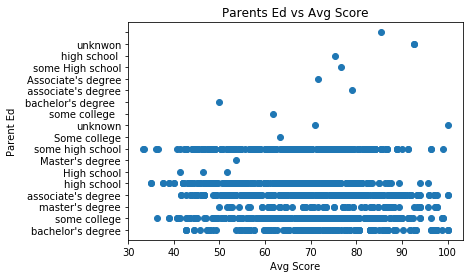

In [25]:
#create figure and axis 
fig, ax = plt.subplots()
#Scatter 
ax.scatter(CleanSDF['Avg Score'], CleanSDF['Parent Ed'])
#Title and Labels
ax.set_title('Parents Ed vs Avg Score')
ax.set_xlabel('Avg Score')
ax.set_ylabel('Parent Ed')

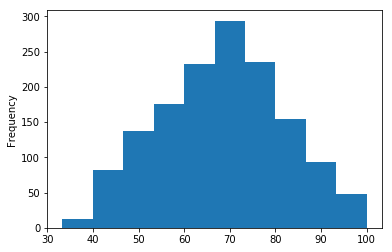

In [26]:
CleanSDF['Avg Score'].plot.hist()


In [27]:
CleanSDF.shape

(1466, 12)

In [33]:
info_return = CleanSDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1466 entries, 0 to 465
Data columns (total 12 columns):
Student Code                1466 non-null object
Race/Ethnicity              401 non-null object
Parent Ed                   1466 non-null object
Lunch                       1466 non-null object
Test Prep                   1466 non-null object
Math Score                  1466 non-null object
Reading Score               1466 non-null int64
Writing Score               1466 non-null int64
Math Test Exemption Date    55 non-null object
City                        1466 non-null object
Gender                      1466 non-null object
Avg Score                   1466 non-null float64
dtypes: float64(1), int64(2), object(9)
memory usage: 188.9+ KB


In [34]:
#Return objects of info and count methods 
count_return = CleanSDF.count().tail()
count_return

Writing Score               1466
Math Test Exemption Date      55
City                        1466
Gender                      1466
Avg Score                   1466
dtype: int64

In [35]:
type(count_return)

pandas.core.series.Series

In [38]:
#isna method returns a dataframe of all true/false values 
CleanSDF_missing = CleanSDF.isna()
CleanSDF_missing.head()

,Student Code,Race/Ethnicity,Parent Ed,Lunch,Test Prep,Math Score,Reading Score,Writing Score,Math Test Exemption Date,City,Gender,Avg Score
0,False,False,False,False,False,False,False,False,True,False,False,False
1,False,True,False,False,False,False,False,False,True,False,False,False
2,False,True,False,False,False,False,False,False,True,False,False,False
3,False,True,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False


In [39]:
#Summing a boolean dataframe 
CleanSDF_num_missing = CleanSDF_missing.sum()
CleanSDF_num_missing

Student Code                   0
Race/Ethnicity              1065
Parent Ed                      0
Lunch                          0
Test Prep                      0
Math Score                     0
Reading Score                  0
Writing Score                  0
Math Test Exemption Date    1411
City                           0
Gender                         0
Avg Score                      0
dtype: int64

In [40]:
#Number rows in dataset 
len(CleanSDF)

1466

In [41]:
#Turning missing values into % 
CleanSDF_missing / len(CleanSDF)

,Student Code,Race/Ethnicity,Parent Ed,Lunch,Test Prep,Math Score,Reading Score,Writing Score,Math Test Exemption Date,City,Gender,Avg Score
0,0,0,0,0,0,0,0,0,0.000682128,0,0,0
1,0,0.000682128,0,0,0,0,0,0,0.000682128,0,0,0
2,0,0.000682128,0,0,0,0,0,0,0.000682128,0,0,0
3,0,0.000682128,0,0,0,0,0,0,0.000682128,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0.000682128,0,0,0,0,0,0,0.000682128,0,0,0
6,0,0,0,0,0,0,0,0,0.000682128,0,0,0
7,0,0.000682128,0,0,0,0,0,0,0.000682128,0,0,0
8,0,0.000682128,0,0,0,0,0,0,0.000682128,0,0,0
9,0,0.000682128,0,0,0,0,0,0,0.000682128,0,0,0
